In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from seaborn import regplot
import matplotlib.pyplot as plt
%matplotlib inline

# PROBLEM 1
### Load the *height_weight.csv* data set
## (A)
### How many features and how many data points are contained in the data set? Use *regplot* to explore the data set. *alpha* controls the transparency of each point. Experiment with polynomial fits by varying the degree of the polynomial using the *order* option. What polynomial degree would you recommend be used to fit the data? Explain.

In [2]:
df = pd.read_csv("./height_weight.csv")

In [3]:
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
df.shape

(25000, 2)

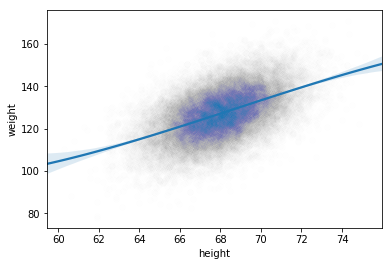

In [17]:
regplot(x='height',y='weight',data=df,order=3,scatter_kws={'alpha':0.003})

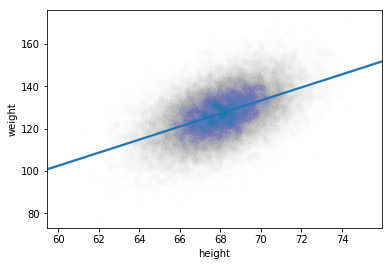

In [18]:
regplot(x='height',y='weight',data=df,order=1,scatter_kws={'alpha':0.003})

#### I would recommend the first polynomial degree be used. I created two curves, the top one being third degree and bottom, first degree. You can see there is little variation between the two. So, we should go with the simplest one: first order.

## (B)
### Write code that uses linear regression and cross-validation to fill in the values in the table below. (Don't standardize the features and set *fit_intercept=False* as feature engineering using *PolynomialFeatures* introduces a bias column of 1's) Plot R-squared train and test vs. degree.

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

,degree,train R2,test R2
0,0,0.000000,-0.000118
1,1,0.252911,0.252726
2,2,0.252923,0.252732
3,3,0.252955,0.252746
4,4,0.253088,0.252845
5,5,0.253083,0.252846
6,6,0.253077,0.252845
7,7,0.253071,0.252843
8,8,0.253064,0.252841
9,9,0.253058,0.252838


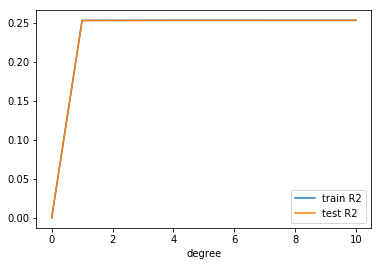

In [19]:
feature = df.height
target  = df.weight
lr = LinearRegression(fit_intercept=False)
degree   = []
R2_train = []
R2_test  = []
for k in range(11):
    poly = PolynomialFeatures(k)
    features_engineered = poly.fit_transform(feature.values.reshape(-1,1))
    results = cross_validate(lr,features_engineered,target,return_train_score=True)
    degree.append(k)
    R2_train.append(results['train_score'].mean())
    R2_test.append(results['test_score'].mean())

performance = pd.DataFrame()
performance['degree'] =  degree
performance['train R2'] = R2_train
performance['test R2']  = R2_test
ax1 = performance.plot.line(x='degree',y='train R2')
performance.plot.line(x='degree',y='test R2',ax=ax1)
performance

## (C)
### Does your filled-in table in part (b) show any evidence of over-fitting as polynomial degree is increased? How about evidence of under-fitting? Explain why or why not. What polynomial degree "hyper-parameter" value do you recommend be used? Explain why.

##### There is no evidence of overfitting since R-squared for the test is about the same as R-squared for the train set. The test set is also very stable as we increase degree. But, the set looks to be underfitted, as we have a small amount of parameters for a VERY large record set.

## (D)
### How much of the variation in weight is explained by height? Explain. (Look at test R-squared) This Large data set needs many more features. Describe at least 3 additional features (if the data were available) that would likely reduce the currently large unexplained variation in the target.

##### Since test R-squared is about 0.25, that means that about 25% of the variation in weight is explained by height. *Body type* (endomorph, mesomorph, and ectomorph) could help explain some of the variations in weight. *Sex* could also explain variations in weight, along with age.

## (E)
### Repeat part (b) using K-nearest neighbors regression for neighborhood sizes ranging from 1 to 1000 in steps of 10. 

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

,neighbors,train R2,test R2
0,1,0.982027,-0.486058
1,101,0.259652,0.245404
2,201,0.256003,0.248822
3,301,0.254986,0.249755
4,401,0.254006,0.249731
5,501,0.253399,0.249809
6,601,0.252796,0.249879
7,701,0.252240,0.249649
8,801,0.251817,0.249507
9,901,0.251370,0.249348


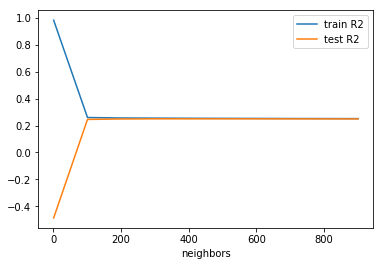

In [21]:
neighbors = []
R2_train  = []
R2_test   = []
for k in np.arange(1,1001,100):
    knn = KNeighborsRegressor(k,n_jobs=-1)
    results = cross_validate(knn,feature.values.reshape(-1,1),target,return_train_score=True)
    neighbors.append(k)
    R2_train.append(results['train_score'].mean())
    R2_test.append(results['test_score'].mean())

performance = pd.DataFrame()
performance['neighbors'] =  neighbors
performance['train R2'] = R2_train
performance['test R2']  = R2_test
ax1 = performance.plot.line(x='neighbors',y='train R2')
performance.plot.line(x='neighbors',y='test R2',ax=ax1)
performance

## (F)
### What value for the K-nearest neighbors regression hyper-parameter would you recommend be used. Justify your answer.

In [22]:
ix = performance['test R2'].idxmax()
performance.iloc[ix]

neighbors    601.000000
train R2       0.252796
test R2        0.249879
Name: 6, dtype: float64

##### The value in question is 601, as this is where maximum test R-squared occurs.

# PROBLEM 2
### Load the *Auto-cleaned.csv* data set. Use engine horsepower, feature engineering, and linear regresion to predict fuel economy (mpg) as described below
## (A)
### Use *regplot* to explroe the data set. Experiment with polynomial fits by varying the degree of the polynomial using the *order* option. What polynomial degree would you recommend be used to fit the data? Explain.

In [28]:
df = pd.read_csv("./Auto-cleaned.csv")

In [29]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


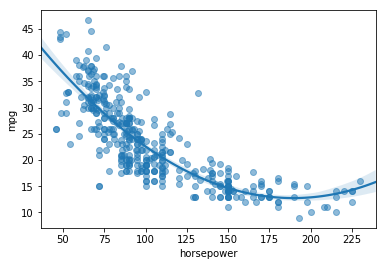

In [44]:
regplot(x='horsepower',y='mpg',data=df,order=2,scatter_kws={'alpha':0.5})

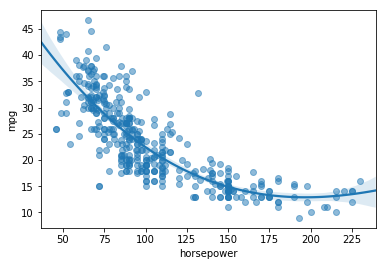

In [45]:
regplot(x='horsepower',y='mpg',data=df,order=3,scatter_kws={'alpha':0.5})

##### Degrees 2 and 3 look similar, but ultimately, 2 is the better fit. This is understood better by the side-by-side comparison

## (B)
### Write code that uses linear regression and cross-validation to fill in the values in the table below. (Don't standardize the features and set *fit_intercept=False* as feature engineering using *PolynomialFeatures* introduces a bias column of 1's) Plot R-squared train and test vs. degree.

In [48]:
feature = df.horsepower
target  = df.mpg
lr = LinearRegression(fit_intercept=False)
degree   = []
R2_train = []
R2_test  = []
for k in range(11):
    poly = PolynomialFeatures(k)
    features_engineered = poly.fit_transform(feature.values.reshape(-1,1))
    results = cross_validate(lr,features_engineered,target,return_train_score=True)
    degree.append(k)
    R2_train.append(results['train_score'].mean())
    R2_test.append(results['test_score'].mean())

performance = pd.DataFrame()
performance['degree'] =  degree
performance['train R2'] = R2_train
performance['test R2']  = R2_test
performance.round(4)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

,degree,train R2,test R2
0,0,-0.0000,-1.0675
1,1,0.6220,0.0423
2,2,0.6984,0.2498
3,3,0.6986,0.2647
4,4,0.6995,0.3138
5,5,0.7056,-0.2965
6,6,0.7049,0.3045
7,7,0.7052,-14.9659
8,8,0.6602,-465.9003
9,9,0.4838,-5150.3114


## (C)
### Does your filled-in table in part (b) show any evidence of over-fitting as polynomial degree is increased? How about evidence of under-fitting? Explain why or why not. What polynomial degree "hyper-parameter" value do you recommend be used? Explain why.

In [49]:
ix = performance['test R2'].idxmax()
performance.iloc[ix]

degree      4.000000
train R2    0.699473
test R2     0.313807
Name: 4, dtype: float64

##### The recommended degree here is 4, as it produces the maximum test R-squared. There is a problem with underfitting. As we increase the degree, we can see the R-squared for train continue to increase, but then it starts decreasing again after degree 7 (this shouldn't happen). R-squared for train should approach 1 as degree is increased.

C:\Users\micha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


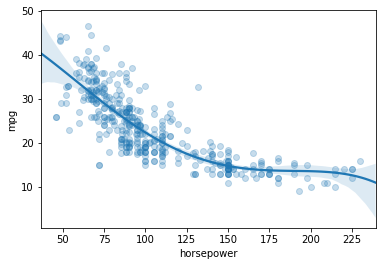

In [50]:
regplot(x='horsepower',y='mpg',data=df,order=4,scatter_kws={'alpha':0.25})

##### Looking at the plot above, we can see the dip in R-squared for train happen around 160 horsepower (see the "cone" getting wider)